# Normal (Gaussian) v.s. Student-t 

In [13]:
import numpy as np 
import pandas as pd
from scipy.stats import norm as norm_dist
from scipy.stats import t as t_dist
# from tabe.utils.logger import logger


def _fit_dist(data: np.array, dist: str = 'best'):
    """
    dist : 'best', 'norm' or 't'
        if 'best', fit both normal and t-distribution, and return the best fit.    

    returns (dist, dist_params) or dist_params
    """

    if dist in ['best', 'norm']:
        norm_params = norm_dist.fit(data)
        norm_ll = np.sum(norm_dist.logpdf(data, *norm_params))
        norm_aic = -2 * norm_ll + 2 * len(norm_params)
        print(f"Normal : Likelihood {norm_ll}, AIC {norm_aic}")

    if dist in ['best', 't']:
        t_params = t_dist.fit(data)
        t_ll = np.sum(t_dist.logpdf(data, *t_params))
        t_aic = -2 * t_ll + 2 * len(t_params)
        print(f"Stud-t : Likelihood {t_ll}, AIC {t_aic}")

    if dist == 'best':
        return ('norm', norm_params) if norm_aic < t_aic else ('t', t_params)
    elif dist == 'norm':
        return norm_params
    else: # if dist == 't':
        return t_params


def get_quantile_value(data: np.array, quantile, left_tail=True, dist='best'):
    """
    left_tail : if True, return value, where P(X ≤ value) == quantile
    """
    quantile = quantile if left_tail else 1-quantile

    dist, params = _fit_dist(data)

    if dist == 'norm':
        value = norm_dist.ppf(quantile, *params)
    else : # dist == 't':
        value = t_dist.ppf(quantile, *params)
    
    return value


def get_cumul_prob(data: np.array, value, left_tail=True, dist='best'):
    """
    x : value 
    left_tail : if True, return P(X ≤ value)
    """

    dist, params = _fit_dist(data)

    if dist == 'norm':
        p = norm_dist.cdf(value, *params)
    else : # dist == 't':
        p = t_dist.cdf(value, *params)
    
    return p if left_tail else 1-p



In [10]:
data = np.linspace(0, 100, 100)

data

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [14]:
get_quantile_value(data, 0.1, left_tail=True)

Normal : Likelihood -479.16557276520984, AIC 962.3311455304197
Stud-t : Likelihood -479.1655727990296, AIC 964.3311455980592


np.float64(12.632972463860227)

In [12]:
get_cumul_prob(data, 10, left_tail=True)

Normal : Likelihood -479.16557276520984, AIC 962.3311455304197
Stud-t : Likelihood -479.1655727990296, AIC 964.3311455980592


np.float64(0.08505462795484753)

In [57]:
import numpy as np
from scipy.stats import norm

data = np.linspace(0, 100, 100)

mean = np.mean(data)
std = np.std(data)

# Now use your fitted normal distribution
cdf_val = norm.cdf(100, loc=mean, scale=std)
print(f"CDF(100): {cdf_val:.5f}")

CDF(100): 0.95681


# Normality Check

In [ ]:
from scipy.stats import shapiro, anderson, kstest, norm

def check_normality(data):

    # Shapiro-Wilk Test (recommended for small to medium datasets)
    stat, p = shapiro(data)
    print(f"Shapiro-Wilk p-value: {p:.4f}")
    if p > 0.05:
        print("✅ Data appears normally distributed (fail to reject H₀)")
    else:
        print("❌ Data is likely not normal (reject H₀)")

    # Anderson-Darling Test 
    # - Tails sensitivity
    # - Stronger for non-normal tails
    result = anderson(data, dist='norm')
    print(f"Anderson-Darling statistic: {result.statistic}")
    print("Critical values:", result.critical_values)
    print("Significance levels:", result.significance_level)  

    # Kolmogorov–Smirnov (K–S) Test          
    # only when testing against a fully specified normal distribution (mean and std known).
    stat, p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def check_normality_visually(data):
    # Create subplots: 1 row, 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: Histogram with KDE
    sns.histplot(data, kde=True, ax=ax1, bins=40, color='skyblue')
    ax1.set_title("Histogram with KDE")
    ax1.grid(True)

    # Plot 2: Q–Q Plot
    # If points fall on the diagonal → data is approximately normal
	# S-curve or deviation at ends → skewness or heavy tails
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title("Q–Q Plot")
    ax2.grid(True)

    # Layout adjustment
    plt.tight_layout()
    plt.show()

Shapiro-Wilk p-value: 0.0000
❌ Data is likely not normal (reject H₀)
Anderson-Darling statistic: 21.441151758889646
Critical values: [0.574 0.654 0.785 0.916 1.089]
Significance levels: [15.  10.   5.   2.5  1. ]


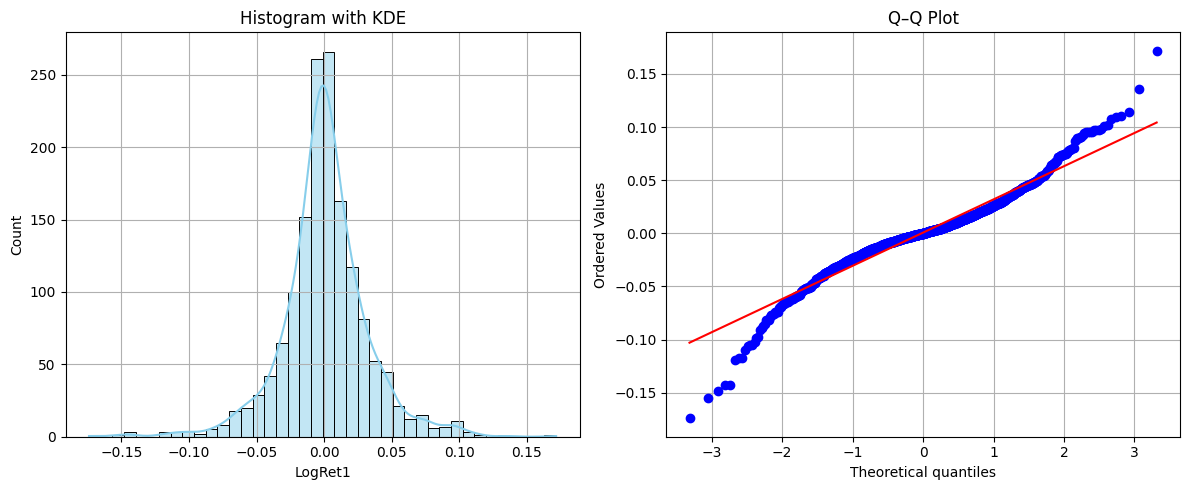

In [ ]:
filepath = '../../dataset/BTC-USD_LogRet1_2021-01-01_2025-03-01_1d.csv'
df_data = pd.read_csv(filepath)

check_normality(df_data['LogRet1'])
check_normality_visually(df_data['LogRet1'])

Shapiro-Wilk p-value: 0.0000
❌ Data is likely not normal (reject H₀)
Anderson-Darling statistic: 30.043977074300983
Critical values: [0.574 0.654 0.785 0.916 1.089]
Significance levels: [15.  10.   5.   2.5  1. ]


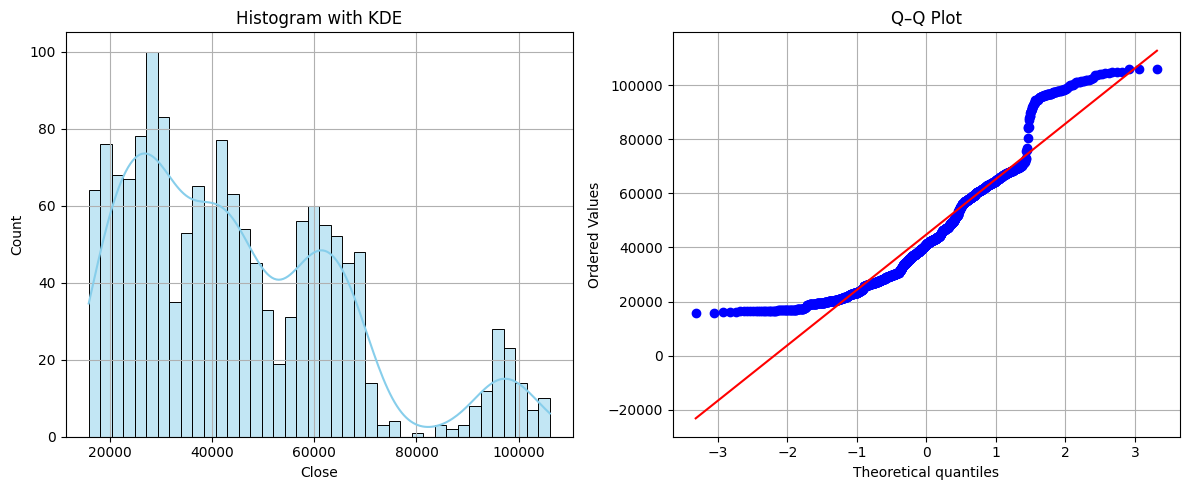

In [27]:
check_normality(df_data['Close'])
check_normality_visually(df_data['Close'])

Test combiner deviation
Normal : LL 138.61111630537602, AIC -273.22223261075203 len(norm_params) 2
Stud-t : LL 138.61111629947163, AIC -271.22223259894326 len(t_params) 3
Shapiro-Wilk p-value: 0.6098
✅ Data appears normally distributed (fail to reject H₀)
Anderson-Darling statistic: 0.32709184949042935
Critical values: [0.543 0.618 0.741 0.865 1.029]
Significance levels: [15.  10.   5.   2.5  1. ]


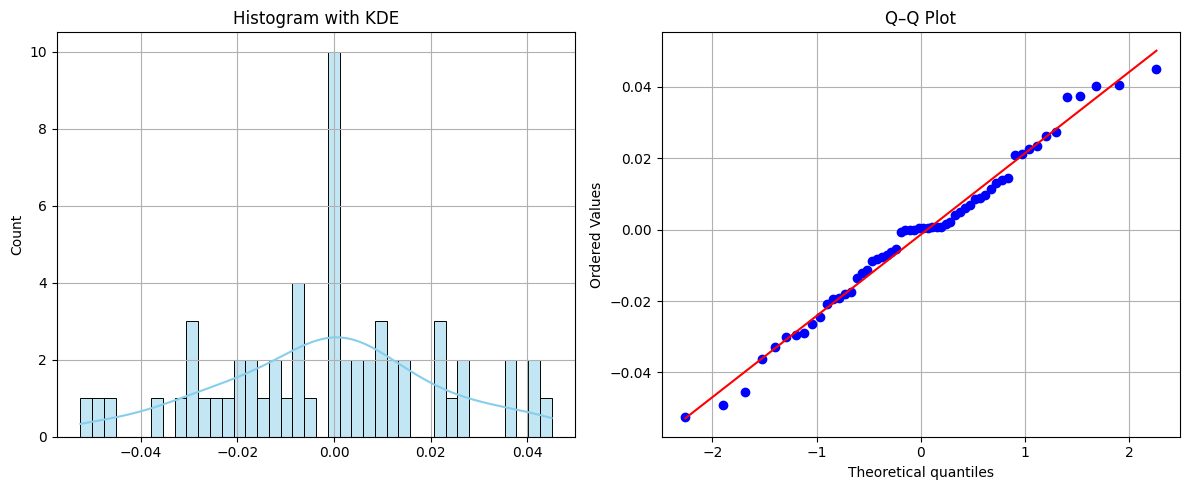

In [28]:
filepath = '../../result/VSCode_sl32_ep1_20250401_125923/forecast_results.csv'
df_data = pd.read_csv(filepath)

data = df_data['Truths'] - df_data['Combiner']
fit_dist(data, 'combiner deviation')
check_normality(data)
check_normality_visually(data)

Test LogRet1
Normal : LL 3071.332164067172, AIC -6138.664328134344 len(norm_params) 2
Stud-t : LL 3204.706111288766, AIC -6403.412222577532 len(t_params) 3
Shapiro-Wilk p-value: 0.0000
❌ Data is likely not normal (reject H₀)
Anderson-Darling statistic: 21.441151758889646
Critical values: [0.574 0.654 0.785 0.916 1.089]
Significance levels: [15.  10.   5.   2.5  1. ]


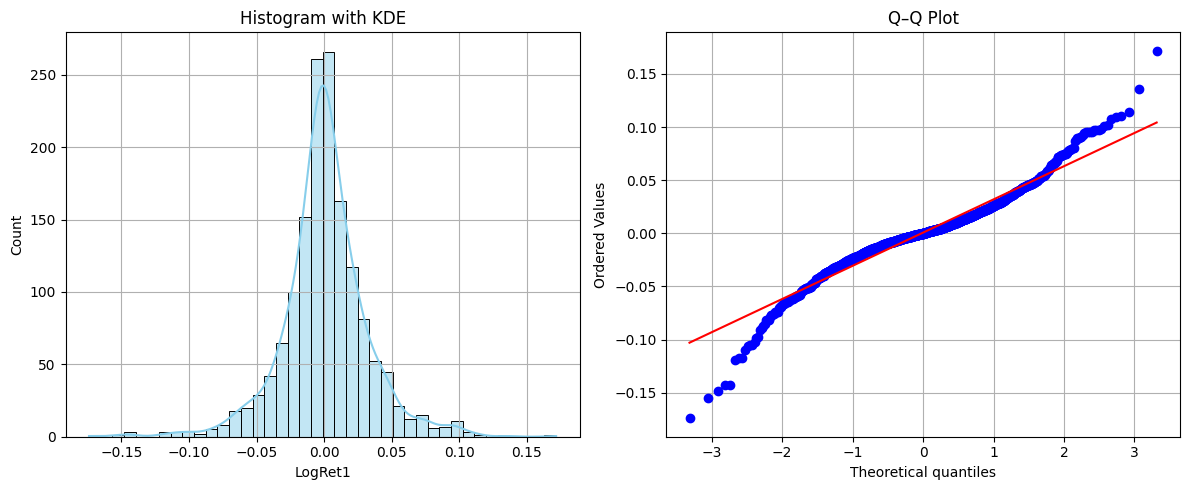

In [29]:
filepath = '../../dataset/BTC-USD_LogRet1_2021-01-01_2025-03-01_1d.csv'
df_data = pd.read_csv(filepath)
data = df_data['LogRet1']
fit_dist(data, 'LogRet1')
check_normality(data)
check_normality_visually(data)

Test Ret1
Normal : LL 3072.4766768093327, AIC -6140.9533536186655 len(norm_params) 2
Stud-t : LL 3204.1359942243944, AIC -6402.271988448789 len(t_params) 3
Shapiro-Wilk p-value: 0.0000
❌ Data is likely not normal (reject H₀)
Anderson-Darling statistic: 21.485050236805364
Critical values: [0.574 0.654 0.785 0.916 1.089]
Significance levels: [15.  10.   5.   2.5  1. ]


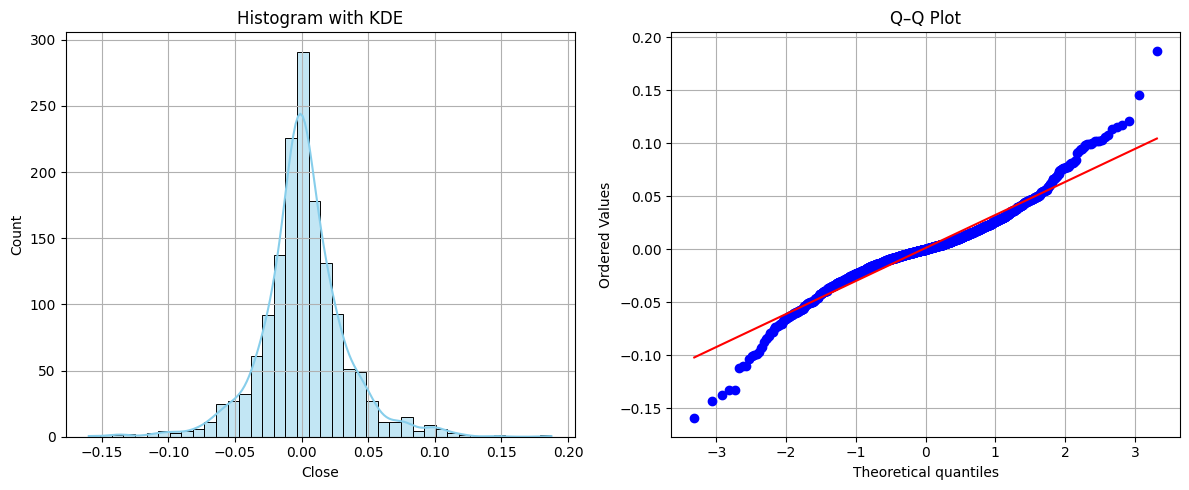

In [30]:
filepath = '../../dataset/BTC-USD_LogRet1_2021-01-01_2025-03-01_1d.csv'
df_data = pd.read_csv(filepath)
data = df_data['Close'].pct_change(periods=1).dropna()
fit_dist(data, 'Ret1')
check_normality(data)
check_normality_visually(data)